# 06 提取最大公共子结构
## 最大公共子结构（Maximum Common Substructure, MCS）是指在两个或多个结构中找到最长的共同子结构。
## 对于两个结构，我们可以计算它们的相似性，并找出它们的最大公共子结构。
## 我们可以用下面的步骤来实现：
- 1. 计算两个结构的相似性矩阵。
- 2. 找出相似性矩阵中最大值对应的下标。
- 3. 根据下标，从两个结构中提取最大公共子结构。


大规模化学数据的聚类与分类对于导航、分析和在药物发现等众多化学应用领域进行知识发现至关重要。

在上一讲05_Clustering_and_Classification中，我们学习了如何对分子进行分组（聚类），并发现同一聚类中的分子彼此相似，共享一个共同的骨架。除了视觉检查，这里还将介绍如何计算一组分子共有的最大子结构，使内容更加自然易懂。

## 理论：
### 相似性矩阵
相似性矩阵是指两个或多个结构之间的相似性。   
对于两个结构，我们可以计算它们的相似性矩阵。矩阵的每一行代表一个原子，每一列代表另一个原子。相似性矩阵的元素表示两个原子之间的相似性。

### 最大公共子结构
最大公共子结构（MCS）是指在两个或多个结构中找到最长的共同子结构。   
对于两个结构，我们可以计算它们的相似性矩阵。矩阵的每一行代表一个原子，每一列代表另一个原子。相似性矩阵的元素表示两个原子之间的相似性。

### 实用内容概览

-  加载并绘制分子
- 使用不同参数运行 FMCS 算法
- 来自 ChEMBL 下载的 EGFR 化合物集合：更加多样化的选择
- 使用交互式截止值自适应方法识别 MCS

最大公共结构（MCS）是指存在于两个或多个候选分子中的最大子结构。

- 寻找最大共同子图同构问题（MCS）是什么
- 在化学信息学领域应用广泛：包括相似性搜索、层次聚类和分子对齐
-  优点：
  - 候选人间可能重要的共享结构（更自然、更易理解的表达）
  - 提供对可能的活动模式的深入见解
  - 通过简单突出亚结构实现直观可视化

关于 MCS 算法的详细信息

- 在两个或多个图中确定最大共同子图（MCS）是一个 NP 完全问题
- 存在精确确定和近似算法，翻译得更加自然易懂
  - 精确求解：最大团问题，采用回溯法和动态规划
  - 近似：遗传算法、组合优化、片段存储等（更自然、更易理解的表达）
  - 问题简化：简化分子图（更自然、更易理解的翻译）

实现示例：FMCS 算法

- 将模型计算问题建模为图同构问题
- 基于子图枚举和子图同构检验

## FMCS 算法的详细解释

FMCS 算法是一种基于枚举的图同构算法，它通过枚举所有可能的子图来寻找最大公共子图。

1. 输入：两个候选分子的分子图 G1 和 G2
2. 输出：最大公共子图的分子图 G
3. 步骤：
   - 枚举所有可能的子图
   - 对于每个子图，计算其 FMCS 值
   - 选择 FMCS 值最大的子图作为 G 的一个候选
4. 停止条件：当找到一个候选 G 使得 G1 和 G2 都包含 G 时，停止。
FMCS 值定义为两个候选分子的分子图 G1 和 G2 的最大公共子图的大小。

```python
简化算法描述（优化版）
best_substructure = None
pick one structure in the set as query, all other as targets
for each substructure in the query:
    convert into a SMARTS string based on the desired match properties
    if SMARTS pattern exists in all of the targets:
        then it is a common substructure
        keep track of the maximum of such substructure
```

![1.png](img/1.png)

####  A) 值得消除的反应

- 移除无法成为 MCS 一部分的键
- 每个输入结构都必须包含原子和键类型信息，这一点非常重要
- 原子类型：由 SMARTS 表示的第一个原子、键和第二个原子的字符串，描述了键的类型
- 排除所有不在所有输入结构中出现的债券类型，删除对应的边
- 结果：包含所有原子信息的碎片化结构，但键的数量较少，表述更自然流畅

#### 使用最小最大片段的结构作为查询

-  启发式方法：
  - 找到每个输入结构中的最大片段
  - 按最大片段中的键数升序排列输入结构
  - 以原子数或输入顺序解决平局（使翻译更自然易懂）
- 结构中最大碎片最小的结构成为查询结构（经过润色）
- 来自其他输入结构的那些是目标（经过润色）

#### 使用广度优先搜索（BFS）和优先队列枚举片段子图

ID：1

C2 * 种子沿着连接的键生长（不在排除集或已在种子中）* 在每一步都考虑所有可能的生长路径 * 例如，如果有 N 个可能的扩展键，则会将 2N−1 个可能的新种子加入队列 * 当没有新的键可以添加到子图时，枚举结束（种子不再加入队列）* 首先处理最大的种子

#### D) 剔除所有其他结构中均未出现的种子

- 在每个生长阶段，检查新种子是否存在于所有其他结构中
- 否则：从队列中排除种子

#### E) 剔除生长潜力不足的种子

- 从排除清单和潜在扩展边缘评估增长潜力的评估
- 如果潜在子图比当前最佳子图小，请从队列中排除种子

利用这些方法，跟踪对应最大公共子结构的最大子图变得非常简单。这使得表述更加自然和易于理解。

In [1]:
from collections import defaultdict
from pathlib import Path
from copy import deepcopy
import random

from ipywidgets import interact, fixed, widgets
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, Geometry
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit.Chem import PandasTools

from teachopencadd.utils import seed_everything

seed_everything()

In [2]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)


/Users/wangyang/Desktop/AIDD/06_Maximum_common_substructure/data


## 1.加载并绘制分子
从05 或更高版本获取的集群数据或 01 的 EGFR 分子数据

In [3]:
sdf = str(HERE / "../05_Compound_clustering/data/molecule_set_largest_cluster.sdf")
supplier = Chem.ForwardSDMolSupplier(sdf)
mols = list(supplier)

print(f"Set with {len(mols)} molecules loaded.")

Set with 108 molecules loaded.


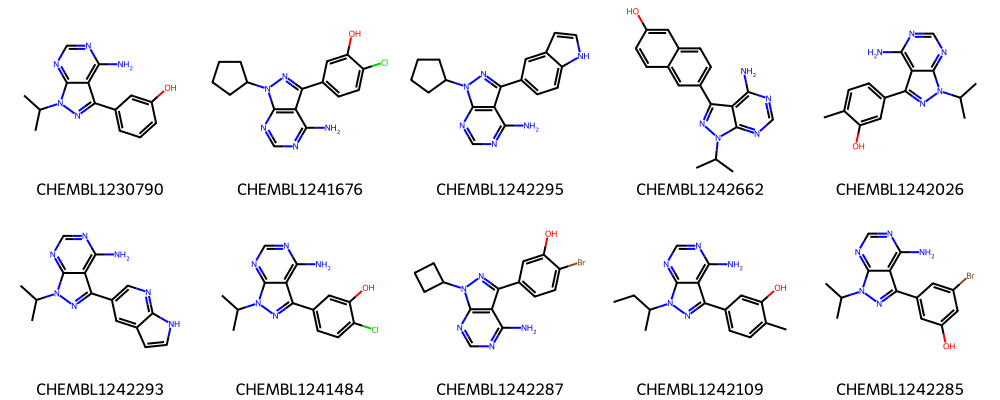

In [4]:
# 只显示前10个分子- -使用切片
num_mols = 10
legends = [mol.GetProp("_Name") for mol in mols]
Draw.MolsToGridImage(mols[:num_mols], legends=legends[:num_mols], molsPerRow=5)

### 2.使用不同输入参数运行 FMCS 算法

FMCS 算法已在 RDKit 中实现，具体为 rdFMCS

####  默认值

在最简单的情况下，仅以参数形式给出分子列表。

In [5]:
mcs1 = rdFMCS.FindMCS(mols)
print(f"MCS1 contains {mcs1.numAtoms} atoms and {mcs1.numBonds} bonds.")
print("MCS SMARTS string:", mcs1.smartsString)

MCS1 contains 14 atoms and 15 bonds.
MCS SMARTS string: [#6]:[#6](-[#6]1:[#7]:[#7](:[#6]2:[#6]:1:[#6](:[#7]:[#6]:[#7]:2)-[#7])-[#6]):[#6]


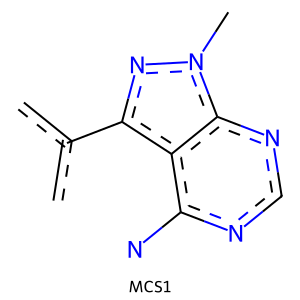

In [6]:
# 从Smarts中绘制子结构
m1 = Chem.MolFromSmarts(mcs1.smartsString)
Draw.MolToImage(m1, legend="MCS1")

定义一个辅助函数以绘制带有高亮 MCS 的分子。

In [7]:
def highlight_molecules(molecules, mcs, number, label=True, same_orientation=True, **kwargs):
    """突出我们的查询分子中的MCS"""
    molecules = deepcopy(molecules)
    # convert MCS to molecule
    pattern = Chem.MolFromSmarts(mcs.smartsString)
    # find the matching atoms in each molecule
    matching = [molecule.GetSubstructMatch(pattern) for molecule in molecules[:number]]

    legends = None
    if label is True:
        legends = [x.GetProp("_Name") for x in molecules]

    # 通过匹配的子结构对齐，以便它们以相同的方向进行描绘
    # Adapted from: https://gist.github.com/greglandrum/82d9a86acb3b00d3bb1df502779a5810
    # 这个人很厉害：你们可以去看看他的博客：https://gist.github.com/greglandrum
    if same_orientation:
        mol, match = molecules[0], matching[0]
        AllChem.Compute2DCoords(mol)
        coords = [mol.GetConformer().GetAtomPosition(x) for x in match]
        coords2D = [Geometry.Point2D(pt.x, pt.y) for pt in coords]
        for mol, match in zip(molecules[1:number], matching[1:number]):
            if not match:
                continue
            coord_dict = {match[i]: coord for i, coord in enumerate(coords2D)}
            AllChem.Compute2DCoords(mol, coordMap=coord_dict)

    return Draw.MolsToGridImage(
        molecules[:number],
        legends=legends,
        molsPerRow=5,
        highlightAtomLists=matching[:number],
        subImgSize=(200, 200),
        **kwargs,
    )

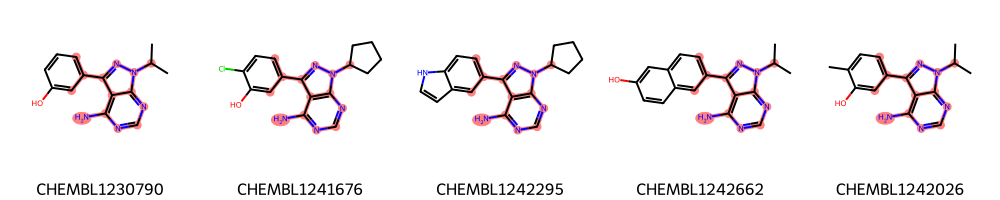

In [8]:
highlight_molecules(mols, mcs1, 5)

保存图片到磁盘

In [10]:
img = highlight_molecules(mols, mcs1, 3, useSVG=True)

# Get SVG data
molsvg = img.data

# 设置背景为透明，扩大标签尺寸
molsvg = molsvg.replace("opacity:1.0", "opacity:0.0").replace("12px", "20px")

# Save altered SVG data to file
with open(DATA / "mcs_largest_cluster.svg", "w") as f:
    f.write(molsvg)

## 2.设置阀值
有可能降低子结构的阈值，例如，使得 MCS 只需在例如 80%的输入结构中发生。



In [11]:
mcs2 = rdFMCS.FindMCS(mols, threshold=0.8)
print(f"MCS2 contains {mcs2.numAtoms} atoms and {mcs2.numBonds} bonds.")
print("SMARTS string:", mcs2.smartsString)

MCS2 contains 19 atoms and 21 bonds.
SMARTS string: [#6]-[#6](-[#6])-[#7]1:[#7]:[#6](:[#6]2:[#6]:1:[#7]:[#6]:[#7]:[#6]:2-[#7])-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1


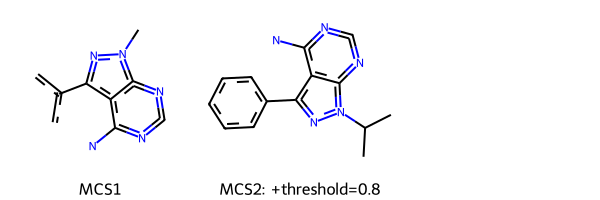

In [12]:
# Draw substructure
m2 = Chem.MolFromSmarts(mcs2.smartsString)
Draw.MolsToGridImage([m1, m2], legends=["MCS1", "MCS2: +threshold=0.8"])

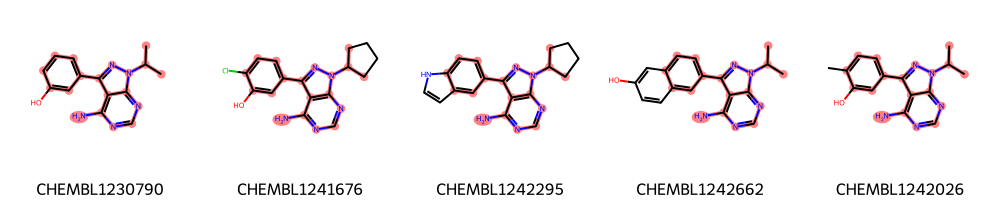

In [13]:
highlight_molecules(mols, mcs2, 5)

如我们在这个例子中所见，由于设定的阈值（ 0.8 ），一些分子现在被省略了。这个阈值允许找到包含例如具有间位取代氟模式的苯环和更长烷基链的更大共同子结构。

## 3.匹配环键
在上面的例子中可能不明显，但默认情况下环状键可以匹配非环状键。通常从应用的角度来看，我们希望保留环状结构。因此，可以将 ringMatchesRingOnly 参数设置为 True ，然后只有环状键与其他环状键相匹配。

In [14]:
mcs3 = rdFMCS.FindMCS(mols, threshold=0.8, ringMatchesRingOnly=True)
print(f"MCS3 contains {mcs3.numAtoms} atoms and {mcs3.numBonds} bonds.")
print("SMARTS string:", mcs3.smartsString)

MCS3 contains 16 atoms and 18 bonds.
SMARTS string: [#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R]:&@[#6&R]:&@1)-&!@[#6&R]1:&@[#7&R]:&@[#7&R]:&@[#6&R]2:&@[#6&R]:&@1:&@[#6&R](:&@[#7&R]:&@[#6&R]:&@[#7&R]:&@2)-&!@[#7&!R]


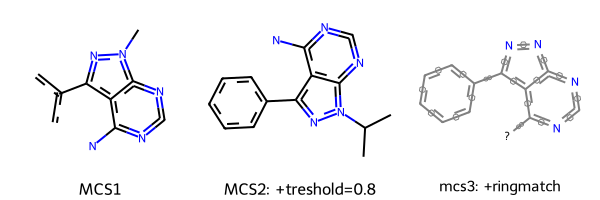

In [15]:
# Draw substructure
m3 = Chem.MolFromSmarts(mcs3.smartsString)
Draw.MolsToGridImage([m1, m2, m3], legends=["MCS1", "MCS2: +treshold=0.8", "mcs3: +ringmatch"])

我们在这里可以看到，根据选择的阈值和参数，我们得到略微不同的 MCS。请注意，在 RDKit FMCS 模块中还有更多参数选项可用，例如考虑原子、键或价匹配。

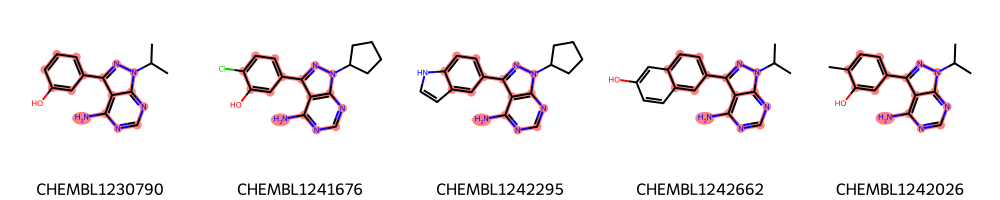

In [16]:
highlight_molecules(mols, mcs3, 5)

## 4. 更多样化的集合：从 ChEMBL 下载的 EGFR 化合物
我们仅将数据限制在高度活跃的分子（pIC50>9）中，并检测这个子集中最大的共有骨架。

In [23]:
# Read full EGFR data
mol_df = pd.read_csv(HERE / "../03_Molecular_filtration_of_unwanted_substructures/data/data_clean_PAINS.csv")
print("Total number of compounds:", mol_df.shape[0])

# Only keep molecules with pIC50 > 9 (IC50 > 1nM)
mol_df = mol_df[mol_df.pIC50 > 9]
print("Number of compounds with pIC50 > 9:", mol_df.shape[0])

Total number of compounds: 4135
Number of compounds with pIC50 > 9: 73


In [24]:
# Add molecule column to data frame
PandasTools.AddMoleculeColumnToFrame(mol_df, "smiles")
mol_df.head(3)

,molecule_chembl_id,IC50,smiles,pIC50,ro5_fulfilled,ROMol
0,CHEMBL429743,0.03,COc1cc2nccc(Oc3ccc4c(C(=O)Nc5ccc(Cl)cc5)cccc4c...,10.522879,True,<rdkit.Chem.rdchem.Mol object at 0x7fa866917280>
1,CHEMBL5186748,0.12,CNC(=O)c1cc(Oc2ccc(NC(=O)c3nn(-c4ccc(Cl)cc4)cc...,9.920819,True,<rdkit.Chem.rdchem.Mol object at 0x7fa866917700>
2,CHEMBL3586072,0.14,CNC(=O)c1ccc(-c2ccc(NC(=O)Nc3cc(Br)cc(C(F)(F)F...,9.853872,True,<rdkit.Chem.rdchem.Mol object at 0x7fa8669174c0>


我们仅在选定的强效分子上做计算。

In [26]:
mols_diverse = []
# ⚠️注意：我们不关心的废弃变量通常用一个下划线来引用
for _, row in mol_df.iterrows():
    m = Chem.MolFromSmiles(row.smiles)
    m.SetProp("_Name", row.molecule_chembl_id)
    mols_diverse.append(m)

## ⚠️ 为了节省时间，我们从这组中随机选取了 50 个分子。

In [38]:
# 我们已经修复了上述随机种子（导入）以获得确定性结果
mols_diverse_sample = random.sample(mols_diverse, 50)

我们现在计算上述描述的相同三种 MCSs 变体，并绘制相应的子结构。我们使用略低的阈值来考虑集合中更大的多样性。

In [39]:
threshold_diverse = 0.7
mcs1 = rdFMCS.FindMCS(mols_diverse_sample)
print("SMARTS string1:", mcs1.smartsString)
mcs2 = rdFMCS.FindMCS(mols_diverse_sample, threshold=threshold_diverse)
print("SMARTS string2:", mcs2.smartsString)
mcs3 = rdFMCS.FindMCS(mols_diverse_sample, ringMatchesRingOnly=True, threshold=threshold_diverse)
print("SMARTS string3:", mcs3.smartsString)

SMARTS string1: [#6](:,-[#6]:,-[#6]:,-[#6]-,:[#7]-,:[#6]):,-[#6]:,-[#6]
SMARTS string2: [#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-,:[#7]-,:[#6]:,-[#6]:,-[#6]
SMARTS string3: [#6&R](:&@[#7&R]):&@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R]:&@[#6&R]


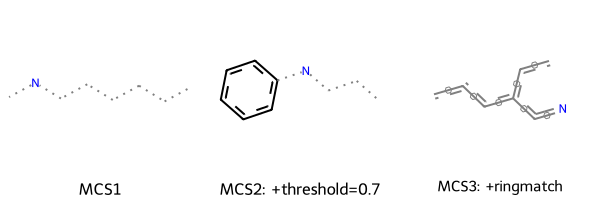

In [40]:
# Draw substructures
m1 = Chem.MolFromSmarts(mcs1.smartsString)
m2 = Chem.MolFromSmarts(mcs2.smartsString)
m3 = Chem.MolFromSmarts(mcs3.smartsString)

Draw.MolsToGridImage(
    [m1, m2, m3],
    legends=[
        "MCS1",
        f"MCS2: +threshold={threshold_diverse}",
        "MCS3: +ringmatch",
    ],
)

这次更加清晰地表明，设置 ringMatchesRingOnly=True 提供了对它们公共子结构的更精确的匹配的支架的更直观表示。

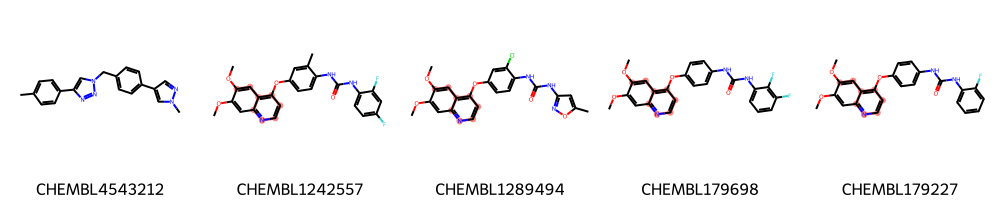

In [41]:
highlight_molecules(mols_diverse_sample, mcs3, 5)

## 5. 识别使用交互式截止值调整的 MCS ¶
我们也可以交互式地更改阈值。为此，我们需要一个辅助函数，在此定义。它接受两个参数： molecules （固定，因此不能通过小部件进行配置）和 percentage （其值由交互式小部件确定）。每次您修改滑块的状

In [42]:
def render_mcs(molecules, percentage):
    """nteractive widget helper . ' molecule '必须包裹在' ipywidgets. fixed ( ) '中，而'百分比'将由一个IntSlider小部件决定"""
    tmcs = rdFMCS.FindMCS(molecules, threshold=percentage / 100.0)
    if tmcs is None:
        print("No MCS found")
        return None

    m = Chem.MolFromSmarts(tmcs.smartsString)
    print(tmcs.smartsString)
    return m

In [ ]:
# 需要注意的是，滑块可能需要几秒钟才能做出反应
interact(
    render_mcs,
    molecules=fixed(mols_diverse_sample),
    percentage=widgets.IntSlider(min=0, max=100, step=10, value=70),
);

最大子结构集合中分子共有的数量可以是一种有用的策略来可视化共同的骨架